[*********************100%***********************]  1 of 1 completed

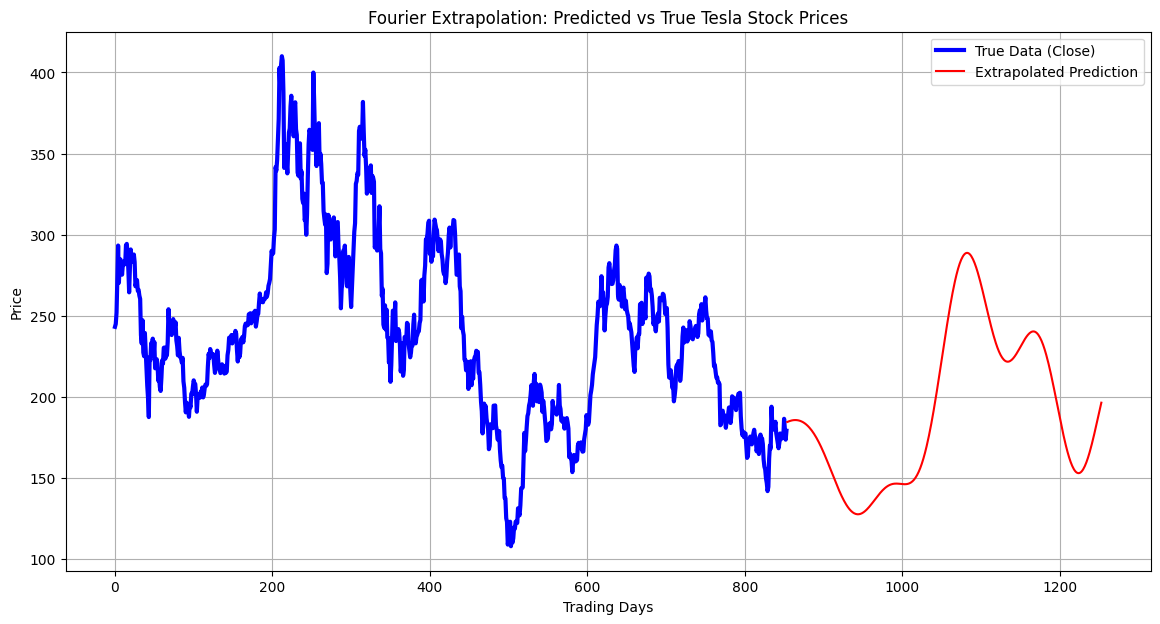

In [ ]:
import numpy as np
import pylab as pl
from numpy import fft
import yfinance as yf
import matplotlib.pyplot as plt

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10  # Number of harmonics in the model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)  # Find linear trend in x
    x_notrend = x - p[0] * t  # Detrended x
    x_freqdom = fft.fft(x_notrend)  # Detrended x in frequency domain
    f = fft.fftfreq(n)  # Frequencies
    indexes = list(range(n))
    
    # Sort indexes by frequency (lower -> higher)
    indexes.sort(key=lambda i: np.absolute(f[i]))
    
    t_extended = np.arange(0, n + n_predict)  # Extended time for prediction
    restored_sig = np.zeros(t_extended.size)
    
    # Sum the harmonics (using the sorted frequency indexes)
    for i in indexes[:1 + n_harm * 2]:  # Using first n_harm harmonics
        ampli = np.absolute(x_freqdom[i]) / n  # Amplitude
        phase = np.angle(x_freqdom[i])  # Phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t_extended + phase)
    
    return restored_sig + p[0] * t_extended  # Add back the linear trend

def plot_fft_extrapolation(true_data, extrapolated_data, pred_len):
    plt.figure(figsize=(14, 7))
    plt.plot(np.arange(len(true_data)), true_data, 'b', label='True Data (Close)', linewidth=3)
    plt.plot(np.arange(len(true_data), len(true_data) + pred_len), extrapolated_data[len(true_data):], 'r', label='Extrapolated Prediction')
    plt.title("Fourier Extrapolation: Predicted vs True Tesla Stock Prices")
    plt.xlabel("Trading Days")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    # plt.show()

def main():
    # Fetch Tesla data from Jan 2021 to Nov 2024
    tsla = yf.download("TSLA", start="2021-01-01", end="2024-05-26")
    
    # Use 'Close' prices for prediction
    close_prices = tsla['Close'].values  # Only use "Close" prices
    
    # Number of days to predict (e.g., 30 days)
    n_predict = 400  # Adjust this as needed
    
    # Apply Fourier Extrapolation to predict future values
    extrapolation = fourierExtrapolation(close_prices, n_predict)
    tsla = yf.download("TSLA", start="2024-05-26", end="2024-11-29")
    
    # Use 'Close' prices for prediction
    close_prices = tsla['Close'].values  # Only use "Close" prices
    # Plot the original vs predicted (extrapolated) data
    plot_fft_extrapolation(close_prices, extrapolation, n_predict)
    plt.show()
    
if __name__ == "__main__":
    main()
